## Linear regression

선형회귀는 일반적인 통계학 과목에서 많이 다루는 내용이라 여기서는 간단히 언급하고 넘어가도록 한다.

여러 입력 변수를 가지는 선형회귀모형을 고려해 보자.

$$ Y = \theta_0 + \theta_1 X_1 + \cdots + \theta_p X_p + \epsilon $$

이 모형의 모수는 $\theta_0, \theta_1, \cdots, \theta_p$이며, 우리는 이 모수들의 추정치를 구하는 데에 관심이 있다.

앞서 공부한 행렬 표현법과 다른점은 모수가 $\theta_0$부터 시작하기 때문에 총 $p+1$개가 존재한다.

또한 $x_{ij}$로 이루어진 $N \times (p+1)$ 행렬 $\mathbf{X}$를 생각할 수 있다.

$$ 
\mathbf{X} = \begin{bmatrix} 
    x_{10} & x_{11} & \cdots & x_{1p}\\
    x_{20} & x_{21} & \cdots & x_{2p}\\
    \vdots & \vdots & \ddots & \vdots \\
    x_{N0} & x_{N1} & \cdots & x_{Np}  
    \end{bmatrix}
$$

$i$번째 관찰값들인 $x_i$는 총 $p+1$개의 값을 지니며, 편의상 $x_{i0} = 1 $로 한다.

그 외의 사항은 앞 단원의 내용과 동일하다.

### 정규방정식

위의 셋팅에서 선형회귀계수들의 추정량은 이론적으로 다음으로 같다는 것이 잘 알려져 있다.

$$ \hat{\boldsymbol{\theta}} = (\mathbf{X}^{\top}\mathbf{X})^{-1} \mathbf{X}^{\top} \mathbf{y} $$

```numpy```를 이용하여 정규방정식을 간단히 테스트 해 보자.

In [1]:
# 가상의 데이터 생성
import numpy as np

X = 2 * np.random.rand(100, 1)
Y = 4 + 3 * X + np.random.randn(100, 1)

# 모든 샘플에 x0 = 1 추가
Xb = np.c_[np.ones((100, 1)), X]

In [2]:
import pandas as pd
pd.DataFrame(Xb)

0         1
0   1.0  1.644521
1   1.0  0.079072
2   1.0  0.719545
3   1.0  1.531417
4   1.0  0.770385
..  ...       ...
95  1.0  0.836099
96  1.0  0.664443
97  1.0  1.607608
98  1.0  0.044751
99  1.0  1.856292

[100 rows x 2 columns]

In [3]:
# dot() 메소드는 행렬곱을 위해 사용됨
theta_best = np.linalg.inv(Xb.T.dot(Xb)).dot(Xb.T).dot(Y)
theta_best

array([[4.30613265],
       [2.68435607]])

```sklearn```을 이용하는 방법도 살펴보자.

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

In [ ]:
# fitting은 간단히 다음으로 이루어진다.
lin_reg.fit(X, Y)
lin_reg.intercept_, lin_reg.coef_

위의 정규 방정식은 이론적으로 다음의 비용함수를 최소화하는 값이다.

$$ \mathrm{MSE}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i)^2 $$

여기서 $\cdot$은 벡터 내적이며, $x_i \cdot \boldsymbol{\theta} = x_i^{\top} \boldsymbol{\theta} $이다.

위 식은 MSE (Mean Squared Error) 비용함수라고 불리우며, 실제값과 예측값 차이의 제곱을 손실함수 ($L_2$ 손실함수)로 하여 이들의 합을 최소화하는 $\boldsymbol{\theta}$를 찾는 것을 목적으로 한다.

$\boldsymbol{\theta} = \begin{bmatrix}\theta_0  & \theta_1 &  \cdots &  \theta_p \end{bmatrix}^{\top}$이기 때문에, $\mathrm{MSE}(\boldsymbol{\theta})$는 실제로 $\theta_0, \theta_1,  \cdots,  \theta_p$의 함수임을 주목하자.

또한, $\mathrm{MSE}(\boldsymbol{\theta})$는 관찰값 $\mathbf{X}$에 따라 달라진다.

기계학습의 많은 방법들은 적절한 비용함수를 정의하고 이 비용함수를 최소화하는 $\boldsymbol{\theta}$를 추정량으로 삼는다.

선형회귀 방법처럼 해석적인 솔루션을 제공하는 경우도 있지만 많은 경우 경사하강법과 같은 수치적 방법을 통해 근사값을 찾아낸다.

연습삼아 선형회귀 모형에 적용해 보자.

### 경사하강법 (GD, Gradient Descent)

경사하강법은 여러 기계학습의 방법론에서 최적의 해를 찾는 일반적인 방법이다.

비용함수, 예를 들어 앞에서 제시한 $\mathrm{MSE}(\boldsymbol{\theta})$는 주어진 관찰값 $\mathbf{X}$이 있을 때, $\theta_0, \theta_1,  \cdots,  \theta_p$의 함수이다.

비용함수의 형태에 따라 $\mathrm{MSE}(\boldsymbol{\theta})$의 $\theta_0, \theta_1,  \cdots,  \theta_p$에 대한 기울기를 이론적으로 계산할 수도 있고, 함수의 형태가 복잡할 경우 수치적으로 계산할 수도 있다.

경사하강법은 계산된 기울기를 바탕으로 기울기가 감소하는 방향을 따라 비용함수를 최소화하는 극소 지점을 향해 조금씩 이동하는 방법이다.

입력변수가 여러 개일 경우, 각각의 변수들에 대해 기울기들을 계산할 수 있는데 이 기울기들을 모아놓은 벡터를 그레디언트 벡터라고 한다.

그레디언트 벡터는 $\nabla$ 혹은 $\nabla_{\boldsymbol{\theta}}$로 표현한다.

따라서 $\mathrm{MSE}(\boldsymbol{\theta})$의 그레디언트 벡터는

$$
\nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta}) = \begin{bmatrix} \frac{\partial}{\partial \theta_0} \mathrm{MSE}(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} \mathrm{MSE}(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_p} \mathrm{MSE}(\boldsymbol{\theta}) \end{bmatrix} 
$$

와 같이 표현할 수 있다.

여기서 $$ \frac{\partial}{\partial \theta_j} \mathrm{MSE}(\boldsymbol{\theta})$$는 편미분이며 다른 변수들을 고정한 후, $\mathrm{MSE}(\boldsymbol{\theta})$를  $\theta_j$로 미분하였음을 의미한다.

### 선형회귀모형의 graident vector


위에서 언급함 비용함수
$$ \mathrm{MSE}(\boldsymbol{\theta}) = \frac{1}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i)^2 $$
를 고려하자.

$$ x_i \cdot \theta = \theta_0 + x_{i1} \theta_1 + \cdots +  x_{ip} \theta_p,$$
이므로, 
$$ \frac{\partial }{\partial \theta_j} (x_i \cdot \boldsymbol{\theta} - y_i)^2 = 2 (x_i \cdot \boldsymbol{\theta} - y_i) x_{ij}$$
를 얻는다.

위의 관계를 이용하면,
\begin{align*}
\frac{\partial }{\partial \theta_j} \mathrm{MSE}(\boldsymbol{\theta}) &= \frac{2}{N} \sum_{i=1}^{N} (x_i \cdot \boldsymbol{\theta} - y_i) x_{ij} \\
& = \frac{2}{N} \begin{bmatrix} x_{1j} \cdots  x_{Nj} \end{bmatrix} 
\left( \begin{bmatrix} x_1 \cdot \boldsymbol{\theta} - y_1 \\ \vdots \\ x_N \cdot \boldsymbol{\theta} - y_N \end{bmatrix}  \right)\\
& = \frac{2}{N} \begin{bmatrix} x_{1j} \cdots  x_{Nj} \end{bmatrix} 
\left( \begin{bmatrix} x_1 \cdot \boldsymbol{\theta}  \\ \vdots \\ x_N \cdot \boldsymbol{\theta}  \end{bmatrix} - \begin{bmatrix} y_{1} \\ \vdots \\ y_N\end{bmatrix}  \right)\\
& = \frac{2}{N} \begin{bmatrix} x_{1j} \cdots  x_{Nj} \end{bmatrix} 
\left( \begin{bmatrix} x_{10} & \cdots & x_{1p}  \\ \vdots &  & \vdots \\ x_{N0} & \cdots & x_{Np}   \end{bmatrix}  \boldsymbol{\theta} - \begin{bmatrix} y_{1} \\ \vdots \\ y_N\end{bmatrix}  \right)\\
& = \frac{2}{N} \mathbf x_j^{\top} (\mathbf X \boldsymbol{\theta} - \mathbf y).
\end{align*}
이다.

따라서 gradient vector는 다음으로 나타난다.
\begin{equation*}
\nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta}) = \begin{bmatrix} \frac{\partial}{\partial \theta_0} \mathrm{MSE}(\boldsymbol{\theta}) \\ \frac{\partial}{\partial \theta_1} \mathrm{MSE}(\boldsymbol{\theta}) \\ \vdots \\ \frac{\partial}{\partial \theta_p} \mathrm{MSE}(\boldsymbol{\theta}) \end{bmatrix} 
= \frac{2}{N} \begin{bmatrix} \mathbf x_0^{\top} (\mathbf X \boldsymbol{\theta}- \mathbf y) \\ \mathbf x_1^{\top} (\mathbf X \boldsymbol{\theta} - \mathbf y) \\ \vdots \\  \mathbf x_p^{\top} (\mathbf X \boldsymbol{\theta} - \mathbf y) \end{bmatrix} = \frac{2}{N} \mathbf X^{\top} (\mathbf X \boldsymbol{\theta} - \mathbf y).
\end{equation*}

### 경사 하강법

적절한 학습률 $\eta$에 대해 내려가는 스텝의 크기는 $\eta \nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta})$로 정한다. 

따라서 현재의 $\boldsymbol{\theta}$에서 다음 스텝에서의 $\boldsymbol{\theta}^{\text{(next step)}}$는 다음과 같다.

$$ \boldsymbol{\theta}^{\text{(next step)}} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \mathrm{MSE} (\boldsymbol{\theta}) $$

그레디언트 벡터는 올라가는 방향이기 때문에 비용함수의 극소점을 향해 내려가기 위해서는 $-$를 취한 것을 볼 수 있다.

학습률 $\eta$가 크면 더 빠르게 극소점을 향해 갈 것이고, $\eta$가 작으면 천천히 향해 갈 것이다.

그러나 학습률이 너무 크면, 극소점을 건너 뛰어 제대로 수렴하지 못할 수도 있다.

많은 경우 비용함수의 정확한 형태를 모르기 때문에 적절한 $\eta$를 설정하는 것은 반복적인 trial and error를 통해 결정할 수 밖에 없다.

경사 하강법은 다시 몇 가지로 분류된다.

### 배치 경사 하강법

경사 하강법을 구현하려면 앞서 살펴 보았던 gradient vector를 매 스텝마다 계산하여야 한다.

만약 gradient vector를 계산할 때 모든 훈련 데이터를 이용한다면 이를 배치 경사 하강법 (batch gradient descent)이라고 한다.

만약 훈련 세트가 매우 크다면 gradient vector를 계산하는데 시간이 오래 걸릴 것이다.

위의 선형회귀 모형에 경사하강법 알고리즘을 적용해 보자.

In [ ]:
import numpy as np
np.random.randn(2, 1)

In [ ]:
eta = 0.1
n_iteration = 1000
N = len(Y)

theta = np.random.randn(2, 1)  #무작위 초기화

for _ in range(n_iteration):
    grad = 2 / N * Xb.T.dot(Xb.dot(theta) - Y)
    theta = theta - eta * grad
    
theta

### 확률적 경사 하강법

확률적 경사 하강법 (stochastic gradient decent)에서는 매 스텝에서 한 개의 샘플을 무작위로 선택하고 그 하나의 샘플에 대한 그레디언트를 계산한다.

매 스텝에서의 그레디언트 계산이 빠르다.

매 반복에서 하나의 샘플만 취하면 되므로, 매우 큰 훈련 데이터도 학습 가능하다.

샘플은 무작위로 선택되므로 배치 경사 하강법보다 불안정하다.

비용함수가 최소값에 이를 때까지 요동치며 접근하며, 최소값에 완전히 안착하지 못한다.

반면 비용함수의 형태가 불규칙할 경우 지역 극소값을 건너뛸수도 있다는 장점이 있다.

최소값에 도달하게 하기 위해서 학습률을 점진적으로 감소시키는 기법이 있다.

매 반복에서 학습률을 결정하는 함수를 학습 스케쥴이라고 한다.

아래 코드에서는 이를 간단히 구현하였다.

In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    
    random_idxes = np.random.choice(range(N), size=N, replace=False)

    for i, rd_id in enumerate(random_idxes):
        xi, yi = Xb[rd_id:rd_id+1], Y[rd_id]
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * N + i)
        theta = theta - eta * grad
        
theta

```sklearn```으로 간단히 구현할 수 있다.

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.1)
sgd_reg.fit(X, Y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

### 미니배치 경사 하강법

각 스텝에서 하나의 샘플이 아니라 미니배치라 불리우는 임의의 작은 샘플에 대해 그레디언트를 계산하는 방법.

미니배치를 적절히 하면 이 알고리즘은 파라미터 공간에서 SGD 보다 덜 불규칙하게 움직인다.

In [ ]:
n_epochs = 1000
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

batch_size = 5
num_batch = N // batch_size

for epoch in range(n_epochs):
    
    random_indexes = np.random.choice(range(num_batch), size=num_batch, replace=False)
        
    for i, rd_id in enumerate(random_indexes):
        xi, yi = Xb[rd_id*batch_size:(rd_id + 1)*batch_size], Y[rd_id*batch_size:(rd_id + 1)*batch_size]
        grad = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * N + i)
        theta = theta - eta * grad
            
theta

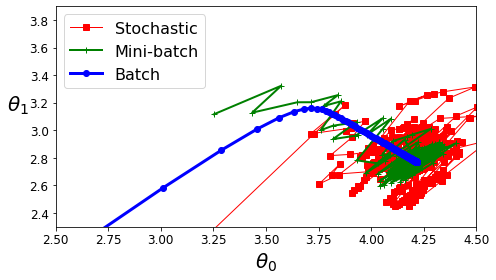